# Bird Stike's Analysis

## Problem Statement:

Transport and communication is one of the crucial domain in field of analytics.
Environmental impacts and safety are, nowadays, two major concerns of the scientific
community with respect to transport scenarios and to the ever-growing urban areas.
These issues gain more importance due to the increasing amount of vehicles and people.
Seeking for new solutions is reaching a point where available technologies and artificial
intelligence, especially MAS, are being recognized as ways to cope and tackle these
kinds of problems in a distributed and more appropriate way.
A bird strike is strictly defined as a collision between a bird and an aircraft which is in
flight or on a take-off or landing roll. The term is often expanded to cover other wildlife
strikes - with bats or ground animals. Bird Strike is common and can be a significant
threat to aircraft safety. For smaller aircraft, significant damage may be caused to the
aircraft structure and all aircraft, especially jet-engine ones, are vulnerable to the loss of
thrust which can follow the ingestion of birds into engine air intakes. This has resulted in
several fatal accidents. Bird strikes may occur during any phase of flight, but are most
likely during the take-off, initial climb, approach and landing phases due to the greater
numbers of birds in flight at lower levels. To have a closer look the following document
visually depicts the data collected on Bird Strikes by FAA between 2000-2011.

### Import Data And Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_excel(r'C:\Users\DELL\Downloads\Bird Strikes_Final.xlsx')

In [3]:
df.head()

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife collected?,Remains of wildlife sent to Smithsonian,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,Caused damage,...,False,False,Medium,No Cloud,Unknown bird - medium,N,30736,1500.0,0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,None,2001-07-25,Caused damage,...,False,False,Small,Some Cloud,Rock pigeon,Y,0,0.0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,None,2001-09-14,No damage,...,False,False,Small,No Cloud,European starling,N,0,50.0,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,2002-09-05,No damage,...,True,False,Small,Some Cloud,European starling,Y,0,50.0,0,Yes
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,None,2003-06-23,No damage,...,False,False,Small,No Cloud,European starling,N,0,50.0,0,No


In [4]:
df.describe()

,Record ID,Wildlife: Number Struck Actual,Cost: Total $,Feet above ground,Number of people injured
count,25556.000000,25556.000000,2.555600e+04,25429.000000,25556.000000
mean,253919.957740,2.691658,5.567790e+03,799.028432,0.001057
std,38509.468604,12.794467,1.219760e+05,1740.079843,0.050422
min,1195.000000,1.000000,0.000000e+00,0.000000,0.000000
25%,225794.250000,1.000000,0.000000e+00,0.000000,0.000000
50%,248756.000000,1.000000,0.000000e+00,50.000000,0.000000
75%,269170.500000,1.000000,0.000000e+00,700.000000,0.000000
max,321909.000000,942.000000,1.239775e+07,18000.000000,6.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25556 entries, 0 to 25555
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Record ID                                25556 non-null  int64         
 1   Aircraft: Type                           25429 non-null  object        
 2   Airport: Name                            25429 non-null  object        
 3   Altitude bin                             25429 non-null  object        
 4   Aircraft: Make/Model                     25556 non-null  object        
 5   Wildlife: Number struck                  25429 non-null  object        
 6   Wildlife: Number Struck Actual           25556 non-null  int64         
 7   Effect: Impact to flight                 25429 non-null  object        
 8   FlightDate                               25429 non-null  datetime64[ns]
 9   Effect: Indicated Damage               

### Data Cleaning

In [6]:
df.isnull().sum()

Record ID                                    0
Aircraft: Type                             127
Airport: Name                              127
Altitude bin                               127
Aircraft: Make/Model                         0
Wildlife: Number struck                    127
Wildlife: Number Struck Actual               0
Effect: Impact to flight                   127
FlightDate                                 127
Effect: Indicated Damage                     0
Aircraft: Number of engines?               267
Aircraft: Airline/Operator                 127
Origin State                               449
When: Phase of flight                      127
Conditions: Precipitation                    0
Remains of wildlife collected?               0
Remains of wildlife sent to Smithsonian      0
Wildlife: Size                             127
Conditions: Sky                              0
Wildlife: Species                            0
Pilot warned of birds or wildlife?         127
Cost: Total $

In [7]:
df.dropna(subset=['Aircraft: Type'], axis=0 , inplace= True)

In [8]:
df.isnull().sum()

Record ID                                    0
Aircraft: Type                               0
Airport: Name                                0
Altitude bin                                 0
Aircraft: Make/Model                         0
Wildlife: Number struck                      0
Wildlife: Number Struck Actual               0
Effect: Impact to flight                     0
FlightDate                                   0
Effect: Indicated Damage                     0
Aircraft: Number of engines?               234
Aircraft: Airline/Operator                   0
Origin State                               449
When: Phase of flight                        0
Conditions: Precipitation                    0
Remains of wildlife collected?               0
Remains of wildlife sent to Smithsonian      0
Wildlife: Size                               0
Conditions: Sky                              0
Wildlife: Species                            0
Pilot warned of birds or wildlife?           0
Cost: Total $

In [9]:
df['Remains of wildlife collected?'] = np.where(df['Remains of wildlife collected?']== True, 'Yes' , 'No')
df['Remains of wildlife sent to Smithsonian'] = np.where(df['Remains of wildlife sent to Smithsonian']== True, 'Yes' , 'No')
df

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife collected?,Remains of wildlife sent to Smithsonian,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,Caused damage,...,No,No,Medium,No Cloud,Unknown bird - medium,N,30736,1500.0,0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,None,2001-07-25,Caused damage,...,No,No,Small,Some Cloud,Rock pigeon,Y,0,0.0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,None,2001-09-14,No damage,...,No,No,Small,No Cloud,European starling,N,0,50.0,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,2002-09-05,No damage,...,Yes,No,Small,Some Cloud,European starling,Y,0,50.0,0,Yes
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,None,2003-06-23,No damage,...,No,No,Small,No Cloud,European starling,N,0,50.0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25550,319672,Airplane,SACRAMENTO INTL,< 1000 ft,B-737-700,1,1,None,2011-12-29,No damage,...,Yes,Yes,Medium,No Cloud,Mallard,Y,0,10.0,0,Yes
25551,321151,Airplane,REDDING MUNICIPAL,> 1000 ft,EMB-120,1,1,None,2011-12-30,No damage,...,No,No,Large,Overcast,Unknown bird - large,N,0,1500.0,0,No
25552,319677,Airplane,ORLANDO INTL,< 1000 ft,A-321,1,1,None,2011-12-30,No damage,...,No,No,Small,Some Cloud,Tree swallow,Y,0,0.0,0,No
25554,319679,Airplane,DETROIT METRO WAYNE COUNTY ARPT,< 1000 ft,B-757-200,1,1,None,2011-12-31,No damage,...,No,No,Medium,Some Cloud,Unknown bird - medium,Y,0,0.0,0,Yes


In [10]:
df['Cost'] = np.where(df['Cost: Total $']== 0 , '0 Cost','Caused Damage')

In [11]:
df

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?,Cost
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,Caused damage,...,No,Medium,No Cloud,Unknown bird - medium,N,30736,1500.0,0,Yes,Caused Damage
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,None,2001-07-25,Caused damage,...,No,Small,Some Cloud,Rock pigeon,Y,0,0.0,0,No,0 Cost
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,None,2001-09-14,No damage,...,No,Small,No Cloud,European starling,N,0,50.0,0,No,0 Cost
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,2002-09-05,No damage,...,No,Small,Some Cloud,European starling,Y,0,50.0,0,Yes,0 Cost
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,None,2003-06-23,No damage,...,No,Small,No Cloud,European starling,N,0,50.0,0,No,0 Cost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25550,319672,Airplane,SACRAMENTO INTL,< 1000 ft,B-737-700,1,1,None,2011-12-29,No damage,...,Yes,Medium,No Cloud,Mallard,Y,0,10.0,0,Yes,0 Cost
25551,321151,Airplane,REDDING MUNICIPAL,> 1000 ft,EMB-120,1,1,None,2011-12-30,No damage,...,No,Large,Overcast,Unknown bird - large,N,0,1500.0,0,No,0 Cost
25552,319677,Airplane,ORLANDO INTL,< 1000 ft,A-321,1,1,None,2011-12-30,No damage,...,No,Small,Some Cloud,Tree swallow,Y,0,0.0,0,No,0 Cost
25554,319679,Airplane,DETROIT METRO WAYNE COUNTY ARPT,< 1000 ft,B-757-200,1,1,None,2011-12-31,No damage,...,No,Medium,Some Cloud,Unknown bird - medium,Y,0,0.0,0,Yes,0 Cost


In [12]:
df.columns

Index(['Record ID', 'Aircraft: Type', 'Airport: Name', 'Altitude bin',
       'Aircraft: Make/Model', 'Wildlife: Number struck',
       'Wildlife: Number Struck Actual', 'Effect: Impact to flight',
       'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $',
       'Feet above ground', 'Number of people injured', 'Is Aircraft Large?',
       'Cost'],
      dtype='object')

### Numeric and Categorical Columns

In [13]:
numeric_Feature = [i for i in df.columns if df[i].dtypes != 'O']
Category_Feature = [i for i in df.columns if df[i].dtypes == 'O']
print('We have {} numeric_Features : {}'.format(len(numeric_Feature),numeric_Feature))

print('We have {} Category_Features :{} '.format(len(Category_Feature),Category_Feature))


We have 6 numeric_Features : ['Record ID', 'Wildlife: Number Struck Actual', 'FlightDate', 'Cost: Total $', 'Feet above ground', 'Number of people injured']
We have 20 Category_Features :['Aircraft: Type', 'Airport: Name', 'Altitude bin', 'Aircraft: Make/Model', 'Wildlife: Number struck', 'Effect: Impact to flight', 'Effect: Indicated Damage', 'Aircraft: Number of engines?', 'Aircraft: Airline/Operator', 'Origin State', 'When: Phase of flight', 'Conditions: Precipitation', 'Remains of wildlife collected?', 'Remains of wildlife sent to Smithsonian', 'Wildlife: Size', 'Conditions: Sky', 'Wildlife: Species', 'Pilot warned of birds or wildlife?', 'Is Aircraft Large?', 'Cost'] 


In [14]:
df['Year'] = df['FlightDate'].dt.year
df['Month'] = df['FlightDate'].dt.month

In [15]:
airport_yr_tot=df.loc[df['When: Phase of flight'].isin(['Climb', 'Take-off run', 'Parked', 'Taxi'])].groupby(
    ['Year', 'Airport: Name']).size().to_frame('Yearly Strikes')
airport_yr_tot.reset_index(level=[0,1], inplace=True)

In [16]:
airport_yr_tot

,Year,Airport: Name,Yearly Strikes
0,2000,ABERDEEN REGIONAL AR,1
1,2000,ABRAHAM LINCOLN CAPITAL ARPT,4
2,2000,ADAMS FIELD ARPT,1
3,2000,AKRON-CANTON MUNICIPAL,1
4,2000,ALBANY INTL,3
...,...,...,...
2932,2011,WORCESTER REGIONAL,1
2933,2011,YAKIMA AIR TERMINAL,1
2934,2011,YAMPA VALLEY,1
2935,2011,YEAGER ARPT,1


In [17]:
df

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?,Cost,Year,Month
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,Caused damage,...,No Cloud,Unknown bird - medium,N,30736,1500.0,0,Yes,Caused Damage,2000,11
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,None,2001-07-25,Caused damage,...,Some Cloud,Rock pigeon,Y,0,0.0,0,No,0 Cost,2001,7
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,None,2001-09-14,No damage,...,No Cloud,European starling,N,0,50.0,0,No,0 Cost,2001,9
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,2002-09-05,No damage,...,Some Cloud,European starling,Y,0,50.0,0,Yes,0 Cost,2002,9
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,None,2003-06-23,No damage,...,No Cloud,European starling,N,0,50.0,0,No,0 Cost,2003,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25550,319672,Airplane,SACRAMENTO INTL,< 1000 ft,B-737-700,1,1,None,2011-12-29,No damage,...,No Cloud,Mallard,Y,0,10.0,0,Yes,0 Cost,2011,12
25551,321151,Airplane,REDDING MUNICIPAL,> 1000 ft,EMB-120,1,1,None,2011-12-30,No damage,...,Overcast,Unknown bird - large,N,0,1500.0,0,No,0 Cost,2011,12
25552,319677,Airplane,ORLANDO INTL,< 1000 ft,A-321,1,1,None,2011-12-30,No damage,...,Some Cloud,Tree swallow,Y,0,0.0,0,No,0 Cost,2011,12
25554,319679,Airplane,DETROIT METRO WAYNE COUNTY ARPT,< 1000 ft,B-757-200,1,1,None,2011-12-31,No damage,...,Some Cloud,Unknown bird - medium,Y,0,0.0,0,Yes,0 Cost,2011,12


In [18]:
airport_yr_tot['Yearly Strikes'].unique()

array([ 1,  4,  3, 14,  6, 11,  2,  7, 18,  8,  5,  9, 12, 10, 22, 15, 20,
       17, 13, 16, 19, 23, 33, 38, 21, 42, 26, 36, 32, 31, 25, 24],
      dtype=int64)

### Data Visualization

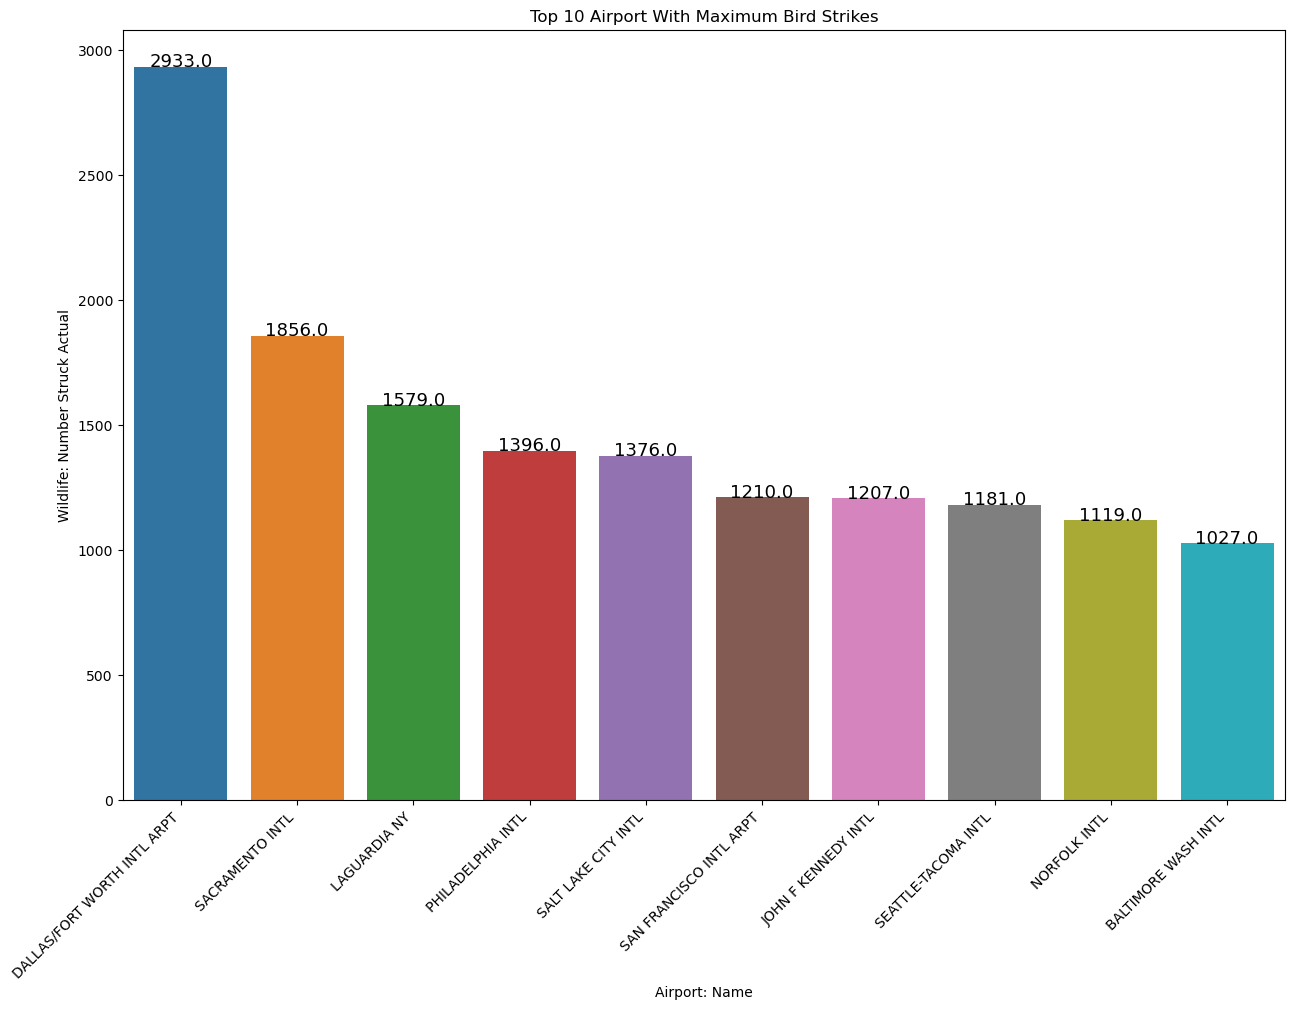

In [19]:
top_10_aircraft = df.groupby('Airport: Name')['Wildlife: Number Struck Actual'].sum()
top_10_aircraft_df = top_10_aircraft.to_frame().reset_index()
top_10_aircraft_df= top_10_aircraft_df.sort_values(by='Wildlife: Number Struck Actual', ascending=False).head(10)

plt.figure(figsize=(15,10))
ax = sns.barplot(data=top_10_aircraft_df, x =top_10_aircraft_df['Airport: Name'] ,y= top_10_aircraft_df['Wildlife: Number Struck Actual'])
for p in ax.patches:
        ax.annotate(p.get_height(),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 13)

plt.title("Top 10 Airport With Maximum Bird Strikes")
plt.xticks(rotation = 45 , ha = 'right')
plt.show()
    

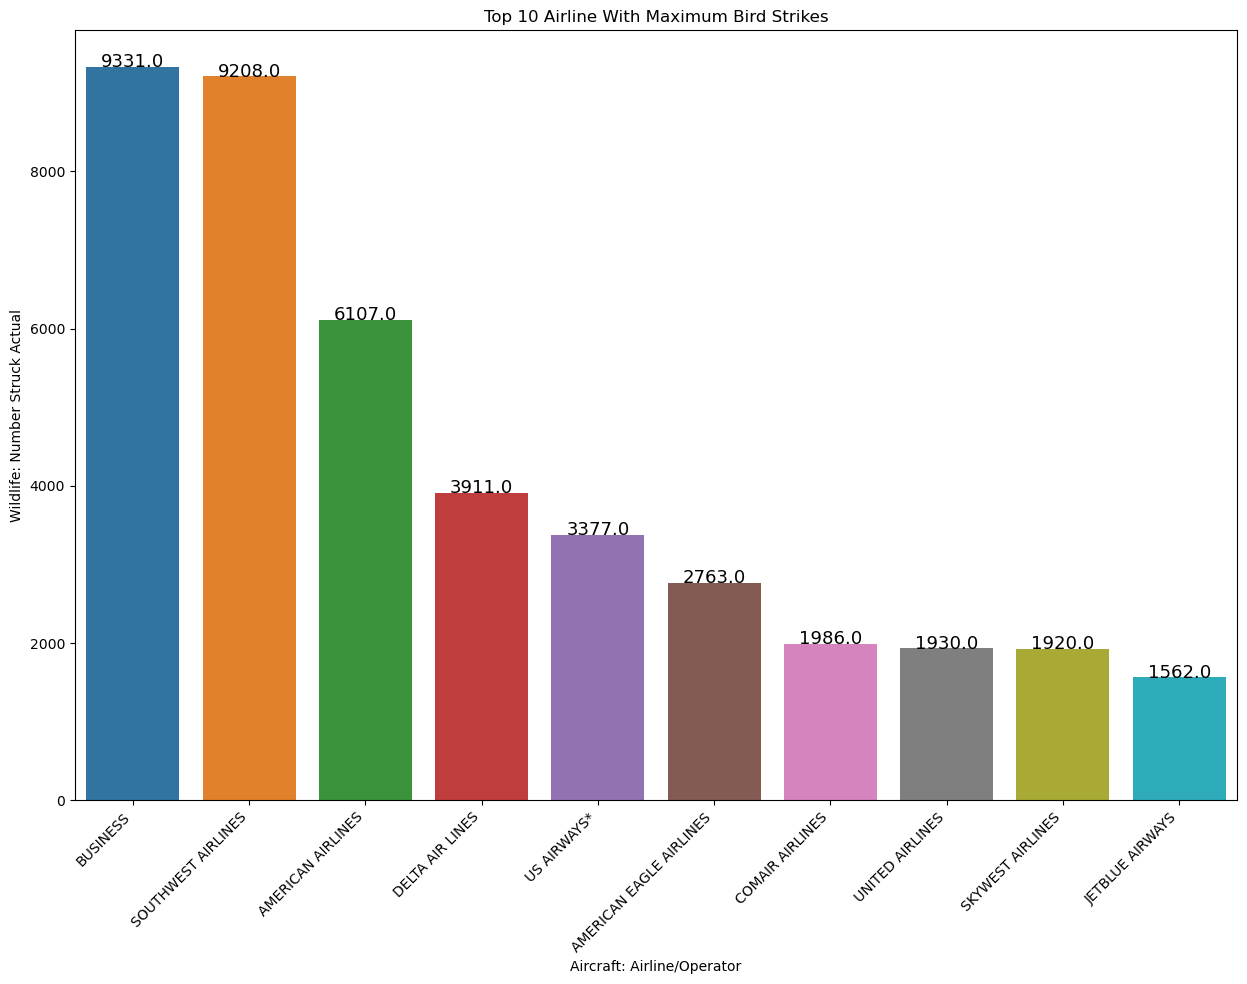

In [20]:
top_10_aircraft = df.groupby('Aircraft: Airline/Operator')['Wildlife: Number Struck Actual'].sum().to_frame().reset_index()
top_10_aircraft= top_10_aircraft.sort_values(by='Wildlife: Number Struck Actual', ascending=False).head(10)

plt.figure(figsize=(15,10))
ax = sns.barplot(data=top_10_aircraft, x =top_10_aircraft['Aircraft: Airline/Operator'] ,y= top_10_aircraft['Wildlife: Number Struck Actual'])
for p in ax.patches:
        ax.annotate(p.get_height(),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 13)

plt.title("Top 10 Airline With Maximum Bird Strikes")
plt.xticks(rotation = 45 , ha = 'right')
plt.show()
    

In [21]:
df.columns

Index(['Record ID', 'Aircraft: Type', 'Airport: Name', 'Altitude bin',
       'Aircraft: Make/Model', 'Wildlife: Number struck',
       'Wildlife: Number Struck Actual', 'Effect: Impact to flight',
       'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $',
       'Feet above ground', 'Number of people injured', 'Is Aircraft Large?',
       'Cost', 'Year', 'Month'],
      dtype='object')

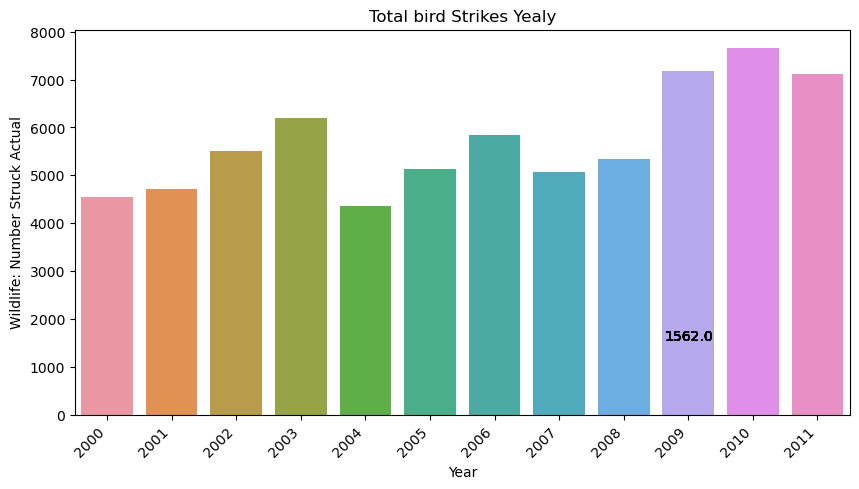

In [22]:
top_year = df.groupby('Year')['Wildlife: Number Struck Actual'].sum().to_frame().reset_index()

plt.figure(figsize=(10,5))
ax= sns.barplot(data=top_year, x= top_year['Year'], y=top_year['Wildlife: Number Struck Actual'])
for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 10)

plt.title("Total bird Strikes Yealy")
plt.xticks(rotation=45, ha= 'right')
plt.show()
    

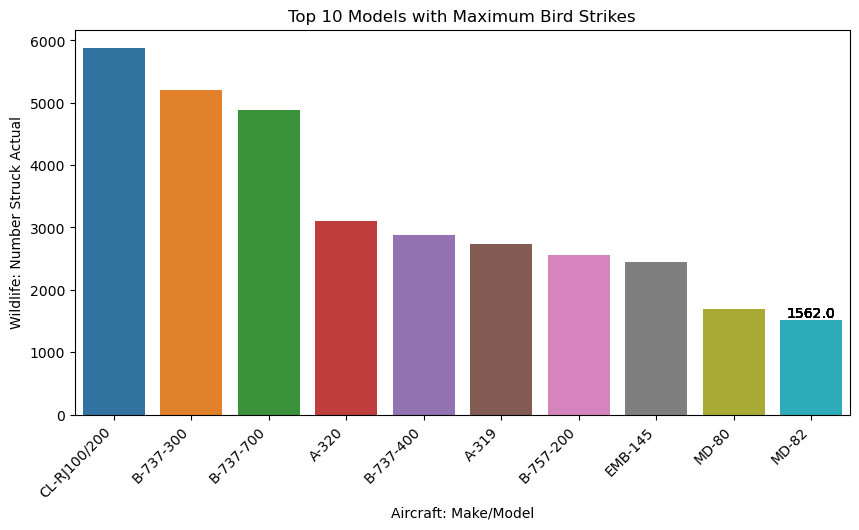

In [23]:
top_model = df.groupby('Aircraft: Make/Model')['Wildlife: Number Struck Actual'].sum().to_frame().reset_index()
top_model= top_model.sort_values(by='Wildlife: Number Struck Actual', ascending=False).head(10)
plt.figure(figsize=(10,5))
ax= sns.barplot(data=top_model, x= top_model['Aircraft: Make/Model'], y=top_model['Wildlife: Number Struck Actual'])
for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 10)

plt.title("Top 10 Models with Maximum Bird Strikes")
plt.xticks(rotation=45, ha= 'right')
plt.show()
    

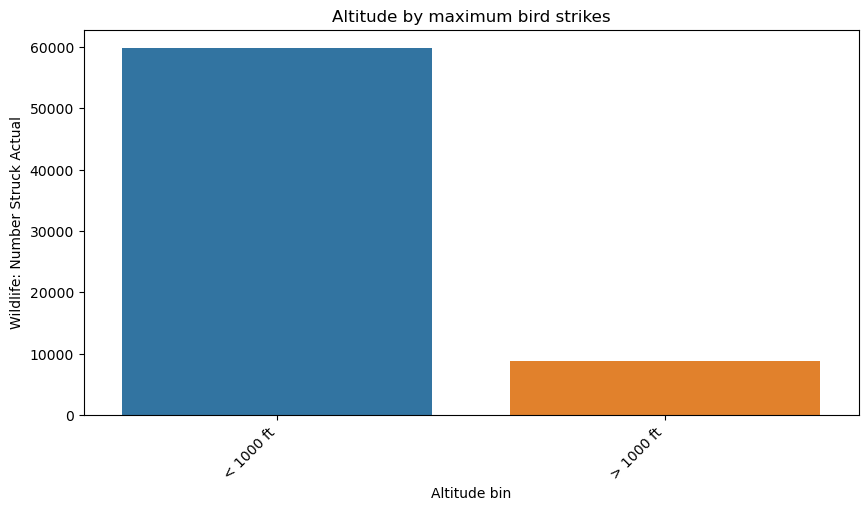

In [24]:
top_Altitude = df.groupby('Altitude bin')['Wildlife: Number Struck Actual'].sum().to_frame().reset_index()

plt.figure(figsize=(10,5))
ax=sns.barplot(data= top_Altitude, x=top_Altitude['Altitude bin'], y= top_Altitude['Wildlife: Number Struck Actual'])
for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 10)
plt.title("Altitude by maximum bird strikes")
plt.xticks(rotation= 45, ha= 'right') 
plt.show()
    

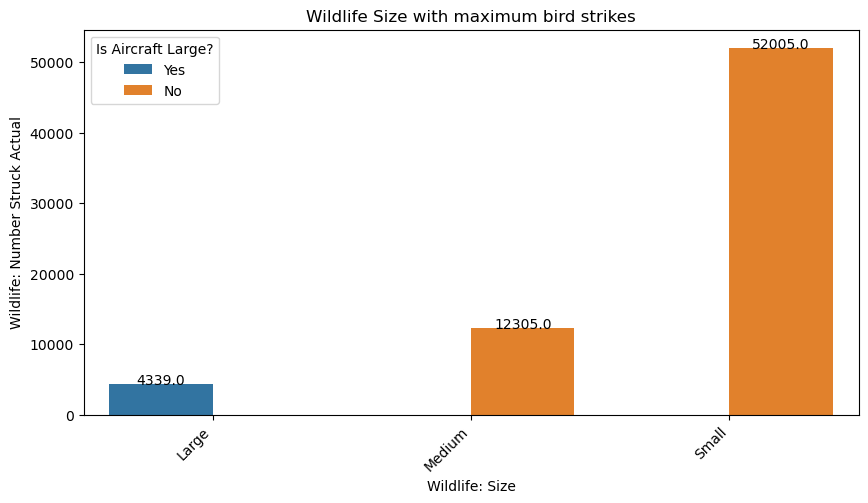

In [39]:
bird_size = df.groupby('Wildlife: Size')['Wildlife: Number Struck Actual'].sum().to_frame().reset_index()

plt.figure(figsize=(10,5))
ax= sns.barplot(data=bird_size , x = bird_size['Wildlife: Size'] ,y= bird_size['Wildlife: Number Struck Actual'], hue= df['Is Aircraft Large?'] )
for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 10)
plt.title("Wildlife Size with maximum bird strikes")
plt.xticks(rotation= 45, ha= 'right') 
plt.show()
    

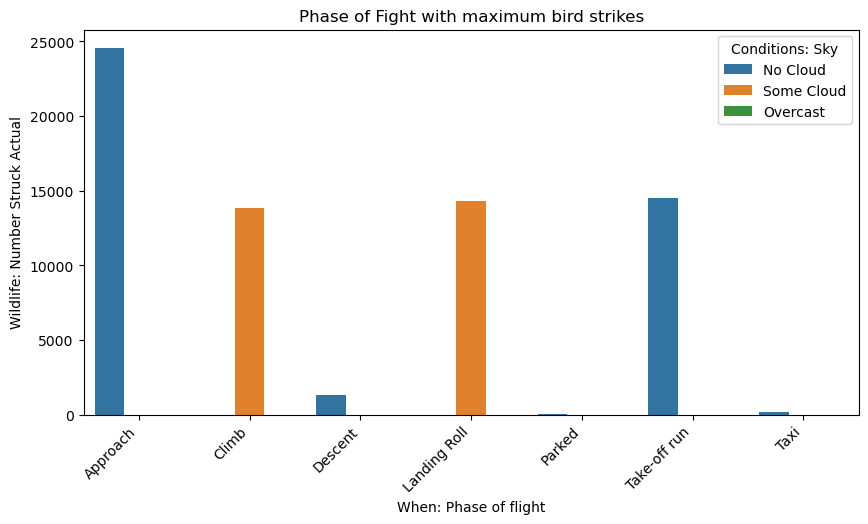

In [27]:
filght_phase = df.groupby('When: Phase of flight')['Wildlife: Number Struck Actual'].sum().to_frame().reset_index()

plt.figure(figsize=(10,5))
ax= sns.barplot(data=filght_phase , x = filght_phase['When: Phase of flight'] ,y= filght_phase['Wildlife: Number Struck Actual'], hue= df['Conditions: Sky'] )
for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 10)
plt.title("Phase of Fight with maximum bird strikes")
plt.xticks(rotation= 45, ha= 'right') 
plt.show()
    
    

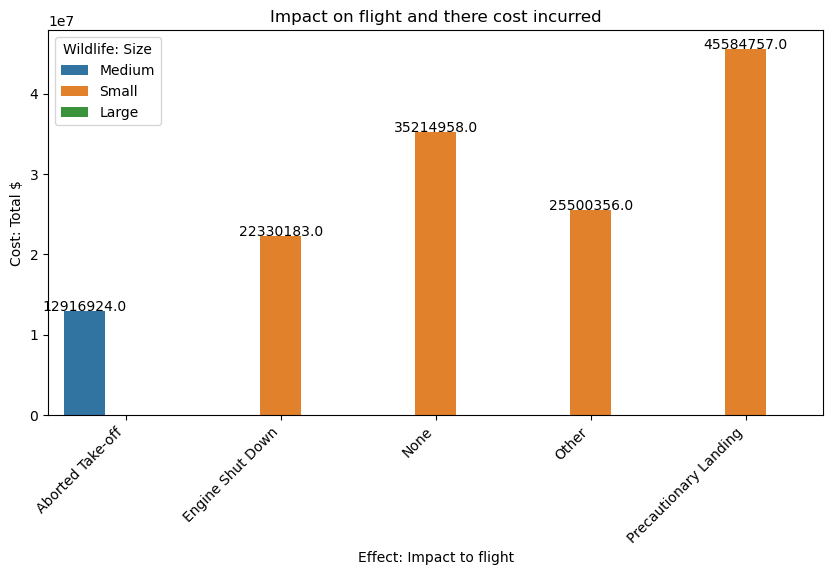

In [35]:
impact_filght = df.groupby('Effect: Impact to flight')['Cost: Total $'].sum().to_frame().reset_index()

plt.figure(figsize=(10,5))
ax= sns.barplot(data=impact_filght , x = impact_filght['Effect: Impact to flight'] ,y= impact_filght['Cost: Total $'], hue= df['Wildlife: Size'] )
for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 10)
plt.title("Impact on flight and there cost incurred")
plt.xticks(rotation= 45, ha= 'right') 
plt.show()
    

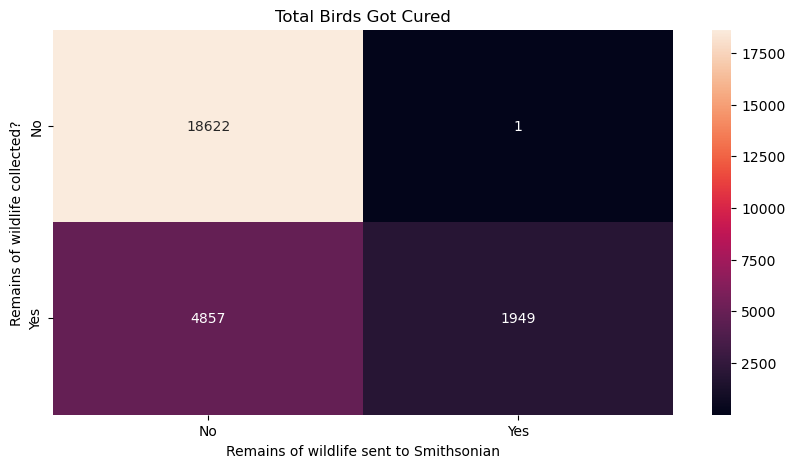

In [55]:
x = pd.crosstab(df['Remains of wildlife collected?'], df['Remains of wildlife sent to Smithsonian'])

plt.figure(figsize=(10,5))
sns.heatmap(data = x, annot = True, fmt ='g'  )
plt.title('Total Birds Got Cured')
plt.show()

In [45]:
df.columns

Index(['Record ID', 'Aircraft: Type', 'Airport: Name', 'Altitude bin',
       'Aircraft: Make/Model', 'Wildlife: Number struck',
       'Wildlife: Number Struck Actual', 'Effect: Impact to flight',
       'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $',
       'Feet above ground', 'Number of people injured', 'Is Aircraft Large?',
       'Cost', 'Year', 'Month'],
      dtype='object')

In [49]:
x

Remains of wildlife collected?,No,Yes
Wildlife: Size,,
Large,1447,633
Medium,4734,1203
Small,12442,4970


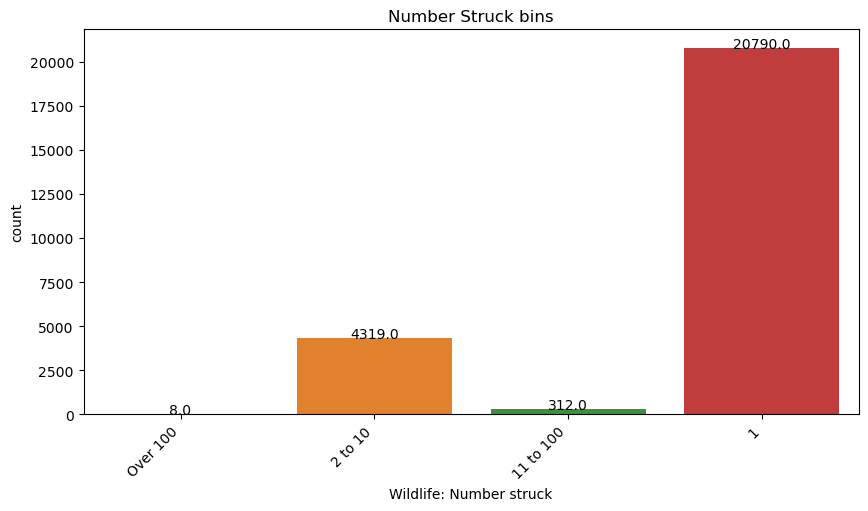

In [57]:
plt.figure(figsize=(10,5))
ax=sns.countplot(data= df, x=df['Wildlife: Number struck'])
for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 10)
plt.title("Number Struck bins")
plt.xticks(rotation= 45, ha= 'right') 
plt.show()
    

#### Overview:-

##### - Total incident occured was 25.43k out of which 69k wildlife got injured.
##### - Maximum number of bird strikes happened in 2010 followed by 2009 and 2011.
##### - When the flight is about to approach and the altitude is less then 1000ft we see maximum number of bird strikes.
##### - Out of the total incidents 6807 birds got collected  and 1949 birds where only treated.
##### - Maximum cost was incured when the flight had to take precautionary landing.
##### - Small size birds got maximum injury with small size aircraft.